In [1]:
## standart libraries
import os,sys
import numpy as np
# xarray
import xarray as xr
# plota
import matplotlib.pyplot as plt

In [2]:
import multiprocessing.popen_spawn_posix
from distributed import Client

# from dask.distributed import Client
c = Client()
# c = Client(n_workers=6, threads_per_worker=1, memory_limit="8 GiB",local_directory="/gpfsscratch/rech/cli/uor98hu/dask_tmp/")
c

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44813 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:40711 Dashboard: http://127.0.0.1:44813/status,Cluster Workers: 5 Cores: 10 Memory: 20.97 GB


In [31]:
CB_colors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

In [3]:
nbsec  = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/nbsec_1m.nc', chunks={'time_counter':1}).nbsec

# Load GREENLAND decomposition

In [4]:
# new avec changement
chunk_size = {'time_counter':1} 

DIFF1dDecomposition = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/average_adv1dDecompostion_Sbudgetterms1980_2018_1m_000_bottom_BGRmaskobsGAI_AI.nc', chunks=chunk_size)

VeloAISGr_boxtscomp = DIFF1dDecomposition.VeloAISGr_boxtscomp
VeloGrSAI_boxtscomp = DIFF1dDecomposition.VeloGrSAI_boxtscomp
VeloGrSGr_boxtscomp = DIFF1dDecomposition.VeloGrSGr_boxtscomp

In [5]:
# GAI-AI
VeloAISGr_boxtscomp_cumsum = (VeloAISGr_boxtscomp*nbsec).cumsum()
VeloGrSAI_boxtscomp_cumsum = (VeloGrSAI_boxtscomp*nbsec).cumsum()
VeloGrSGr_boxtscomp_cumsum = (VeloGrSGr_boxtscomp*nbsec).cumsum()

## Vérification: sum(greenland decomposed) = adv_h of Greenland

In [12]:
decomp_greenland = VeloAISGr_boxtscomp_cumsum + VeloGrSAI_boxtscomp_cumsum + VeloGrSGr_boxtscomp_cumsum

In [9]:
adv_h_GAI = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/GAI_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size)
adv_h_AI = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/AI_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size)
adv_h_GAI_AI = adv_h_GAI.adv_h_cumsum - adv_h_AI.adv_h_cumsum 

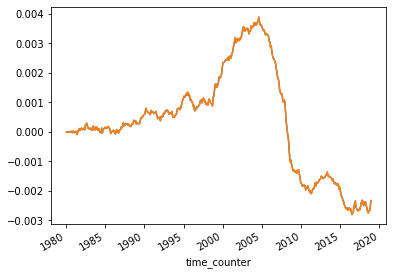

In [13]:
adv_h_GAI_AI.plot()
decomp_greenland.plot()

# LOAD RIVERS contribution

In [6]:
# décomposition S-AI
RIVERS1dDecomposition = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/average_adv1dDecompostion_Sbudgetterms1980_2018_1m_000_bottom_BGRmaskobsS_AI.nc', chunks=chunk_size)

VeloAISRiv_boxtscomp = RIVERS1dDecomposition.VeloAISRiv_boxtscomp *(-1)
VeloRivSAI_boxtscomp = RIVERS1dDecomposition.VeloRivSAI_boxtscomp *(-1)
VeloRivSRiv_boxtscomp = RIVERS1dDecomposition.VeloRivSRiv_boxtscomp *(-1)

In [7]:
# AI-S
VeloAISRiv_boxtscomp_cumsum = (VeloAISRiv_boxtscomp*nbsec).cumsum()
VeloRivSAI_boxtscomp_cumsum = (VeloRivSAI_boxtscomp*nbsec).cumsum()
VeloRivSRiv_boxtscomp_cumsum = (VeloRivSRiv_boxtscomp*nbsec).cumsum()

## Vérification: sum(RIVERS decomposed) = adv_h of RIVERS

In [8]:
decomp_rivers = VeloAISRiv_boxtscomp_cumsum + VeloRivSAI_boxtscomp_cumsum + VeloRivSRiv_boxtscomp_cumsum

In [10]:
adv_h_S = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/S_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size)
adv_h_AI = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/AI_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size)
adv_h_AI_S = adv_h_AI.adv_h_cumsum - adv_h_S.adv_h_cumsum 

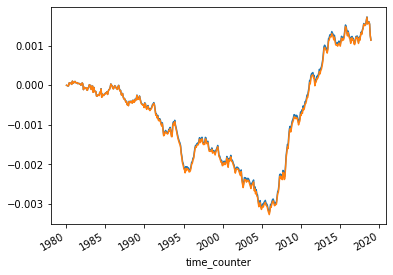

In [13]:
adv_h_AI_S.plot()
decomp_rivers.plot()

# COMPUTE Gr+Riv

In [14]:
# GAI-S
VeloAISanom = VeloAISRiv_boxtscomp_cumsum + VeloAISGr_boxtscomp_cumsum
VeloAnomSAI = VeloRivSAI_boxtscomp_cumsum + VeloGrSAI_boxtscomp_cumsum
VeloAnomSanam = VeloRivSRiv_boxtscomp_cumsum + VeloGrSGr_boxtscomp_cumsum

## Vérification: sum(Gr+Riv decomposed) = adv_h 

In [15]:
decomp_gr_riv = VeloAISanom + VeloAnomSAI + VeloAnomSanam

In [16]:
adv_h_S = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/S_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size)
adv_h_GAI = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/GAI_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size)
adv_h_GAI_S = adv_h_GAI.adv_h_cumsum - adv_h_S.adv_h_cumsum 

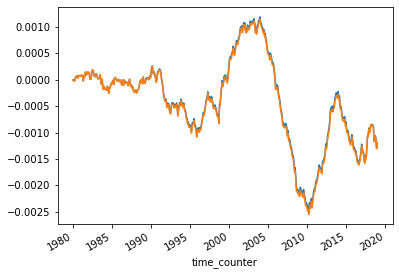

In [17]:
adv_h_GAI_S.plot()
decomp_gr_riv.plot()

# plot figure for paper

In [20]:
adv_h_GAI = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/GAI_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size).load()
adv_h_AI = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/AI_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size).load()
adv_h_S = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/BILAN/BILANS/data4figure/final_after_review/BGRmask/S_adv_h_cumsum_1980_2018_after_review.nc', chunks=chunk_size).load()
adv_h_GAI_AI = (adv_h_GAI.adv_h_cumsum - adv_h_AI.adv_h_cumsum )[:-1]
adv_h_AI_S = (adv_h_AI.adv_h_cumsum - adv_h_S.adv_h_cumsum )[:-1]
adv_h_GAI_S = (adv_h_GAI.adv_h_cumsum - adv_h_S.adv_h_cumsum )[:-1]

In [18]:
diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/"

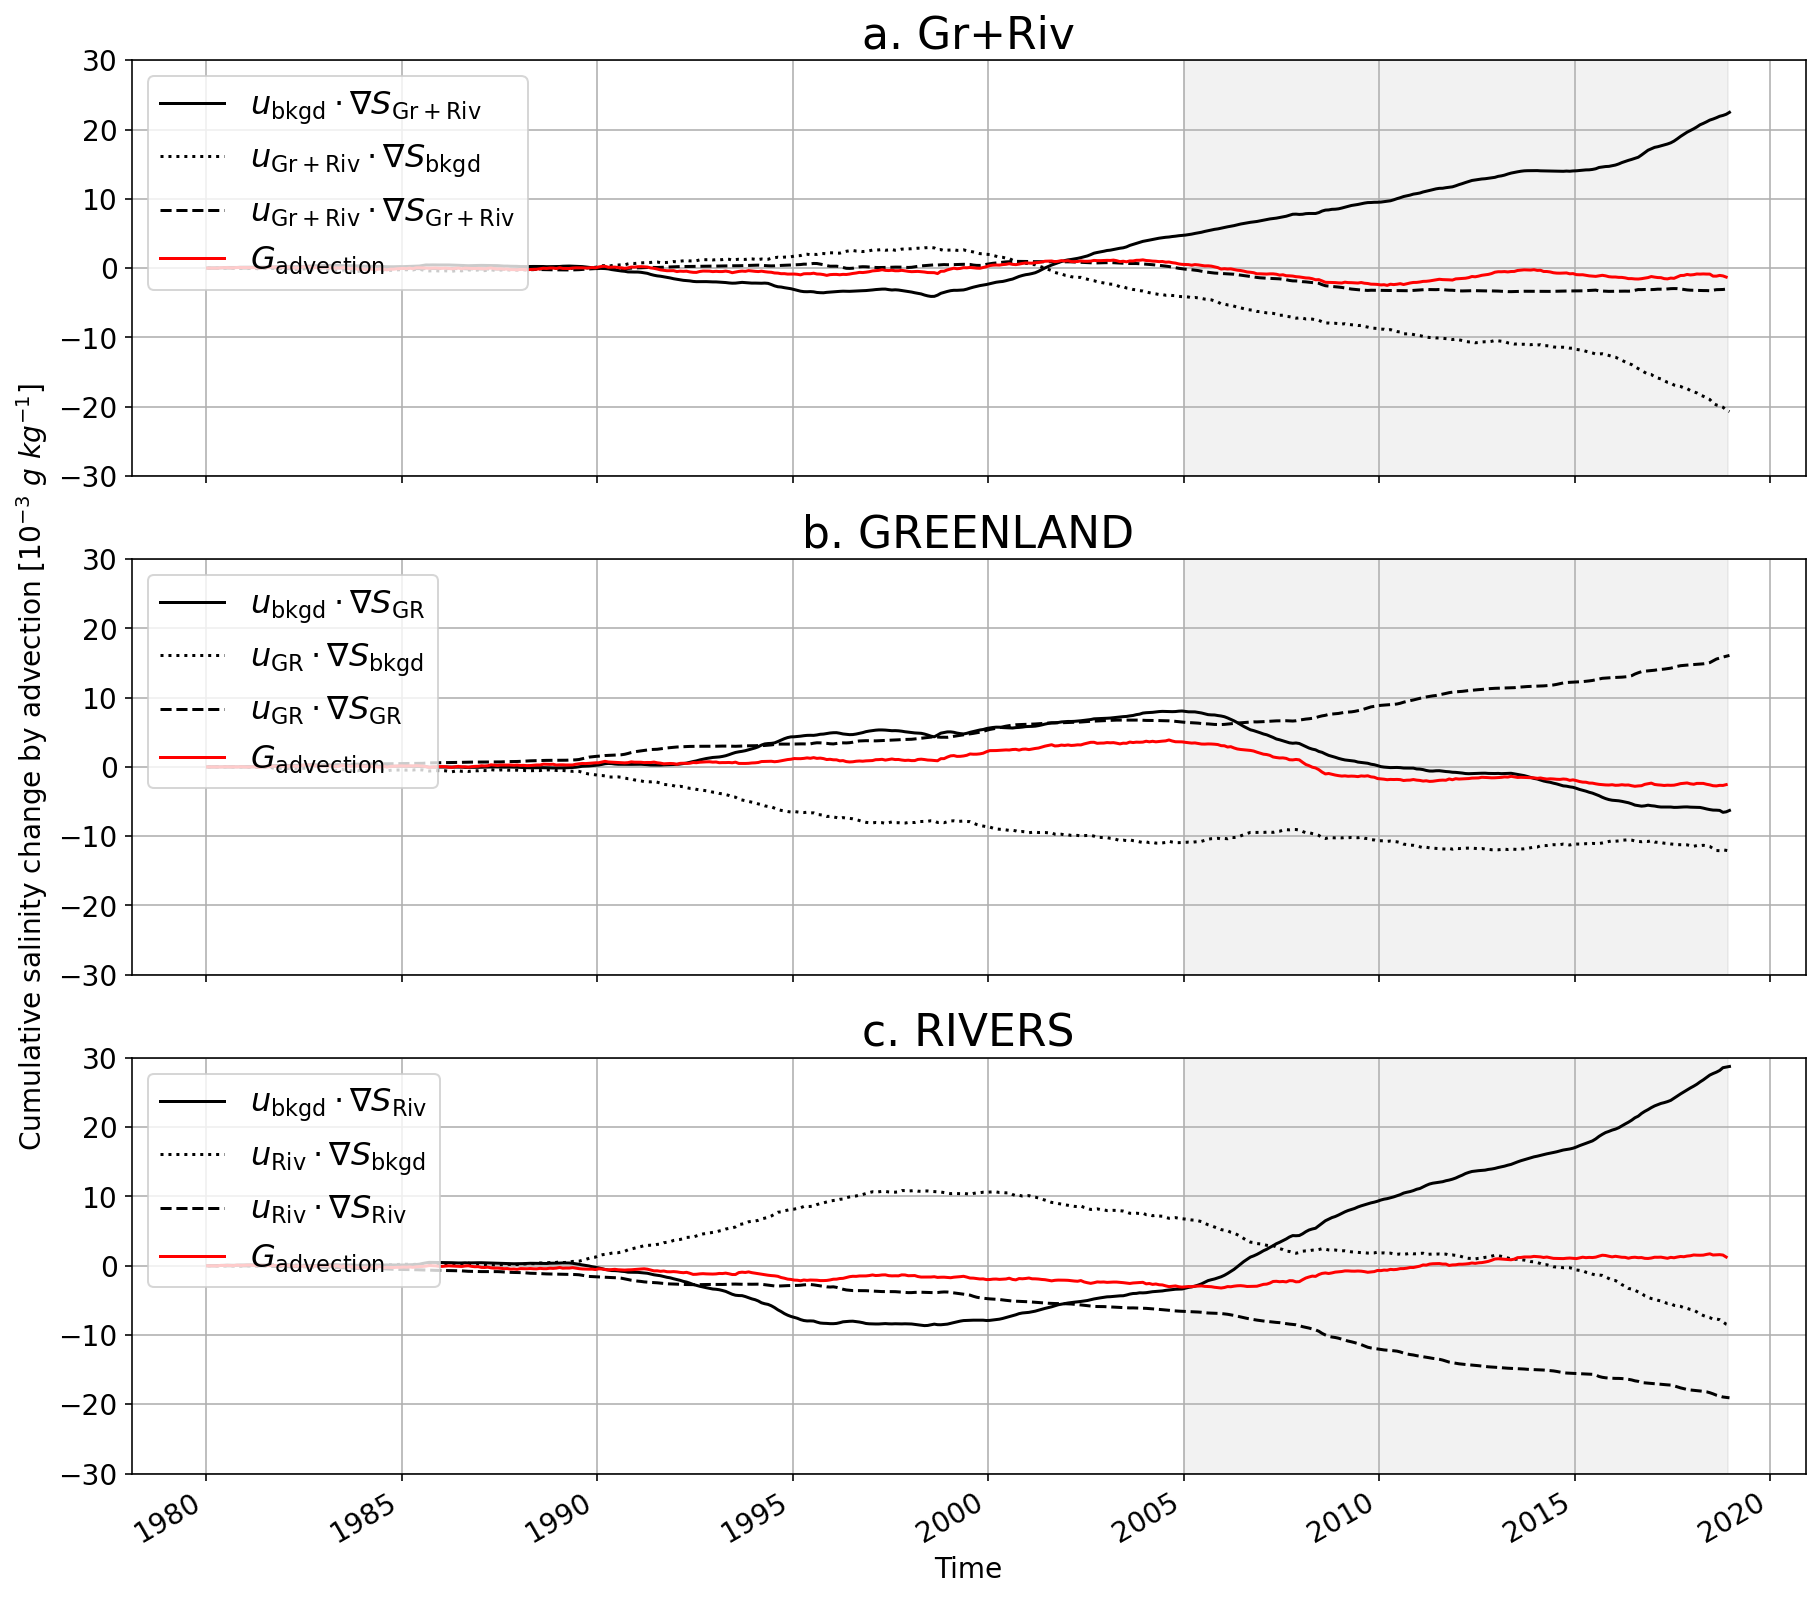

In [35]:
namo ="adv_decomposition000_bottom_BGRmaskobs_4paperv3.png"
fig, [ax0,ax1,ax2] = plt.subplots(3,1, figsize=(15,13), facecolor='none', dpi=72*2, sharex=True, sharey=True) # gridspec_kw = {'hspace':0.05}

miny=-0.03* 1e3
maxy=0.03* 1e3

### ------- Gr+Riv
(VeloAISanom*   1e3).plot(ax=ax0, color='k')
(VeloAnomSAI*   1e3).plot(ax=ax0, color='k',linestyle='dotted')
(VeloAnomSanam* 1e3).plot(ax=ax0, color='k',linestyle='dashed')
(adv_h_GAI_S*   1e3).plot(ax=ax0, color="red")

ax0.axvspan('2005', '2018-12', color="grey", alpha=0.1)

ax0.set_ylim(miny,maxy)
ax0.set_xlabel('')
ax0.set_ylabel('') #Salinity anomaly advection (10$^{-3}$)', fontsize=14); 
ax0.legend([r'$u_\mathrm{bkgd}\cdot\nabla S_\mathrm{Gr+Riv}$', r'$u_\mathrm{Gr+Riv}\cdot\nabla S_\mathrm{bkgd}$', 
              r'$u_\mathrm{Gr+Riv}\cdot\nabla S_\mathrm{Gr+Riv}$', r"$G_\mathrm{advection}$"], loc="upper left", fontsize=16)
ax0.grid()
ax0.set_title('a. Gr+Riv', fontsize=22)


### ------- Gr
ax1.set_ylim(miny,maxy)
(VeloAISGr_boxtscomp_cumsum* 1e3).plot(ax=ax1,color='k')
(VeloGrSAI_boxtscomp_cumsum* 1e3).plot(ax=ax1,color='k',linestyle='dotted')
(VeloGrSGr_boxtscomp_cumsum* 1e3).plot(ax=ax1,color='k',linestyle='dashed')
(adv_h_GAI_AI* 1e3).plot(ax=ax1, color="red")

ax1.axvspan('2005', '2018-12', color="grey", alpha=0.1)

ax1.set_xlabel('')

ax1.set_ylabel(r'Cumulative salinity change by advection [10$^{-3}$ $g~kg^{-1}$]', fontsize=14); 

ax1.legend([r'$u_\mathrm{bkgd}\cdot\nabla S_\mathrm{GR}$', r'$u_\mathrm{GR}\cdot\nabla S_\mathrm{bkgd}$', 
              r'$u_\mathrm{GR}\cdot\nabla S_\mathrm{GR}$', r"$G_\mathrm{advection}$"], loc="upper left", fontsize=16)
ax1.grid()
ax1.set_title('b. GREENLAND', fontsize=22)


### ------- RIVERS
(VeloAISRiv_boxtscomp_cumsum*  1e3).plot(ax=ax2,color='k')
(VeloRivSAI_boxtscomp_cumsum*  1e3).plot(ax=ax2,color='k',linestyle='dotted')
(VeloRivSRiv_boxtscomp_cumsum* 1e3).plot(ax=ax2,color='k',linestyle='dashed')
(adv_h_AI_S* 1e3).plot(ax=ax2, color="red")

ax2.axvspan('2005', '2018-12', color="grey", alpha=0.1)

ax2.set_ylim(miny,maxy)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('') #Salinity anomaly advection (10$^{-3}$)', fontsize=14); 
ax2.legend([r'$u_\mathrm{bkgd}\cdot\nabla S_\mathrm{Riv}$', r'$u_\mathrm{Riv}\cdot\nabla S_\mathrm{bkgd}$', 
              r'$u_\mathrm{Riv}\cdot\nabla S_\mathrm{Riv}$', r"$G_\mathrm{advection}$"], loc="upper left", fontsize=16)
ax2.grid()
ax2.set_title('c. RIVERS', fontsize=22)

ax0.tick_params(axis='both', labelsize=14)
ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

# plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), pad_inches=0.1, bbox_inches='tight') #,edgecolor='none', bbox_inches='tight'
# plt.close(fig) 

# COMPUTE percentages (not used) 

In [29]:
## Gr+Riv
totGrRiv = abs(VeloAnomSanam) + abs(VeloAnomSAI) + abs(VeloAISanom)
propSolidGrRiv  = (abs(VeloAISanom)  /totGrRiv) * 100
propDashedGrRiv = (abs(VeloAnomSanam)/totGrRiv) * 100
propDottedGrRiv = (abs(VeloAnomSAI)  /totGrRiv) * 100

## GREENLAND
totGr      = abs(VeloGrSGr_boxtscomp_cumsum) + abs(VeloGrSAI_boxtscomp_cumsum) + abs(VeloAISGr_boxtscomp_cumsum)
propSolidGr  = (abs(VeloAISGr_boxtscomp_cumsum)  /totGr) * 100
propDashedGr = (abs(VeloGrSGr_boxtscomp_cumsum)  /totGr) * 100
propDottedGr = (abs(VeloGrSAI_boxtscomp_cumsum)  /totGr) * 100

## RIVERS
totriv      = abs(VeloRivSRiv_boxtscomp_cumsum) + abs(VeloRivSAI_boxtscomp_cumsum) + abs(VeloAISRiv_boxtscomp_cumsum)
propSolidriv  = (abs(VeloAISRiv_boxtscomp_cumsum)  /totriv) * 100
propDashedriv = (abs(VeloRivSRiv_boxtscomp_cumsum)  /totriv) * 100
propDottedriv = (abs(VeloRivSAI_boxtscomp_cumsum)  /totriv) * 100

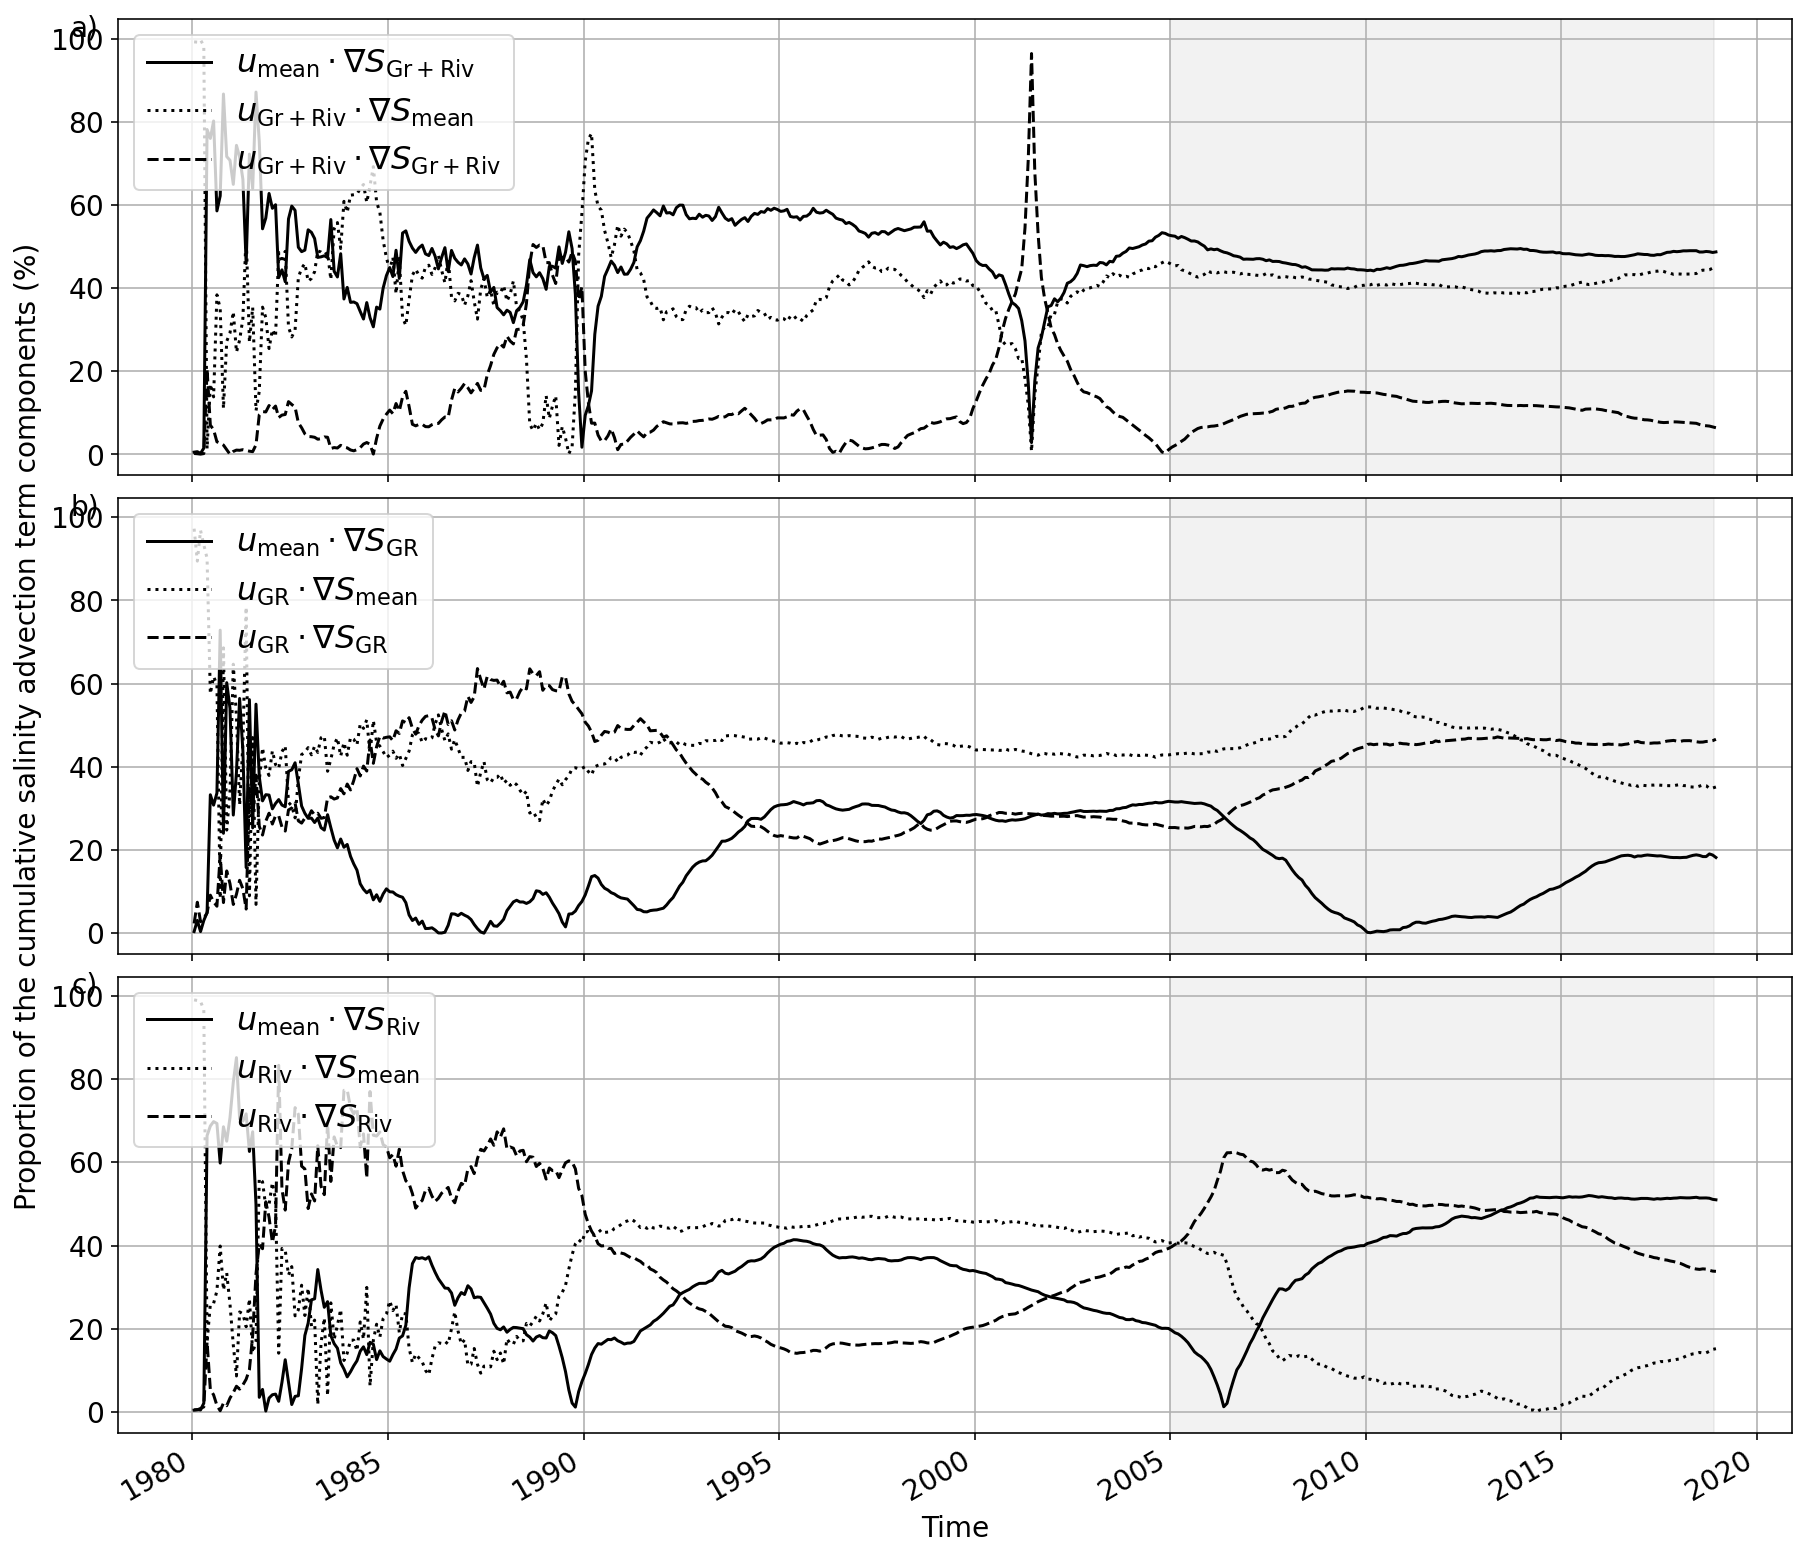

In [30]:
namo ="decomposition_percentage.png"
fig, [ax0,ax1,ax2] = plt.subplots(3,1, figsize=(15,13), facecolor='none', dpi=72*2, sharex=True, sharey=True, gridspec_kw = {'hspace':0.05})

### ------- Gr+Riv
(propSolidGrRiv).plot(ax=ax0, color='k')
(propDottedGrRiv).plot(ax=ax0, color='k',linestyle='dotted')
(propDashedGrRiv).plot(ax=ax0, color='k',linestyle='dashed')

ax0.axvspan('2005', '2018-12', color="grey", alpha=0.1)

# ax0.set_ylim(-0.025,0.025)
ax0.set_xlabel('')
ax0.set_ylabel('') #Salinity anomaly advection (10$^{-3}$)', fontsize=14); 
ax0.legend([r'$u_\mathrm{mean}\cdot\nabla S_\mathrm{Gr+Riv}$', r'$u_\mathrm{Gr+Riv}\cdot\nabla S_\mathrm{mean}$', 
              r'$u_\mathrm{Gr+Riv}\cdot\nabla S_\mathrm{Gr+Riv}$'], loc="upper left", fontsize=16)
ax0.grid()


### ------- Gr
(propSolidGr).plot(ax=ax1,color='k')
(propDottedGr).plot(ax=ax1,color='k',linestyle='dotted')
(propDashedGr).plot(ax=ax1,color='k',linestyle='dashed')
ax1.axvspan('2005', '2018-12', color="grey", alpha=0.1)

# ax1.set_ylim(-0.025,0.025)
ax1.set_xlabel('')
ax1.set_ylabel(r'Proportion of the cumulative salinity advection term components (%)', fontsize=14); 
ax1.legend([r'$u_\mathrm{mean}\cdot\nabla S_\mathrm{GR}$', r'$u_\mathrm{GR}\cdot\nabla S_\mathrm{mean}$', 
              r'$u_\mathrm{GR}\cdot\nabla S_\mathrm{GR}$'], loc="upper left", fontsize=16)

ax1.grid()


### ------- RIVERS
(propSolidriv) .plot(ax=ax2,color='k')
(propDottedriv) .plot(ax=ax2,color='k',linestyle='dotted')
(propDashedriv).plot(ax=ax2,color='k',linestyle='dashed')
ax2.axvspan('2005', '2018-12', color="grey", alpha=0.1)

# ax2.set_ylim(-0.025,0.025)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('') #Salinity anomaly advection (10$^{-3}$)', fontsize=14); 
ax2.legend([r'$u_\mathrm{mean}\cdot\nabla S_\mathrm{Riv}$', r'$u_\mathrm{Riv}\cdot\nabla S_\mathrm{mean}$', 
              r'$u_\mathrm{Riv}\cdot\nabla S_\mathrm{Riv}$'], loc="upper left", fontsize=16)
ax2.grid()


# ax0.text(-0.02, 0.98, 'a)', fontsize=14, horizontalalignment='center', verticalalignment='center', transform=ax0.transAxes)
# # ax1.text(-0.02, 0.98, 'b)', fontsize=14, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
# ax2.text(-0.02, 0.98, 'c)', fontsize=14, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

ax0.tick_params(axis='both', labelsize=14)
ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

plt.show()
# fig.savefig(diro+namo, facecolor=fig.get_facecolor(), pad_inches=0.1, bbox_inches='tight') #,edgecolor='none', bbox_inches='tight'
# plt.close(fig) 
